In [1]:
import pandas
import os
import numpy as np

In [2]:
dir = './experiment/cnn_cifar10/'
namelist = os.listdir(dir)

In [3]:
import pandas as pd
epoch = 1000

sample_train = pd.DataFrame(columns=['train_loss', 'train_acc', 'epoch', 'width'])
sample_test = pd.DataFrame(columns=['test_loss', 'test_acc', 'epoch', 'width'])

for name in namelist:
    width = (int(name.split('_')[1][5:]))
    sample = pd.read_csv(dir+name+'/version_0/'+'metrics.csv')
    sample_trainlossa = []
    sample_trainacca= []
    sample_testloss = []
    sample_testacc = []
    sample_train_epoch = sample[['train_loss', 'train_acc', 'epoch']].dropna(axis=0, how='any').groupby('epoch').agg('mean')
    sample_train_epoch['epoch'] = sample_train_epoch.index
    sample_test_epoch = sample[['test_loss', 'test_acc', 'epoch']].dropna(axis=0, how='any')
    sample_train_epoch['width'] = width
    sample_test_epoch['width'] = width
    sample_train = pd.concat([sample_train, sample_train_epoch])
    sample_test = pd.concat([sample_test, sample_test_epoch])
    

In [4]:
sample_test.reset_index(drop=True, inplace=True)
sample_train.reset_index(drop=True, inplace=True)

In [5]:
def get_final(pds):
    return pds.iloc[-1]

sample_train_width = sample_train.groupby('width').apply(get_final).drop(['epoch'], axis=1)
sample_test_width = sample_test.groupby('width').apply(get_final).drop(['epoch'], axis=1)

In [6]:
sample_train_width

,train_loss,train_acc,width
width,,,
1,1.882082,0.376758,1
2,1.739720,0.461328,2
3,1.562633,0.491211,3
4,1.414729,0.567969,4
5,1.238821,0.618359,5
6,1.275020,0.621484,6
7,1.162474,0.633594,7
8,0.853190,0.731250,8
9,0.716583,0.758008,9


In [7]:
sample_test_width

,test_loss,test_acc,width
width,,,
1,1.659270,0.4164,1
2,1.383520,0.5398,2
3,1.282850,0.5700,3
4,1.292622,0.5545,4
5,1.362039,0.5299,5
6,1.407033,0.5345,6
7,1.606087,0.4963,7
8,1.813420,0.4789,8
9,2.193855,0.4558,9


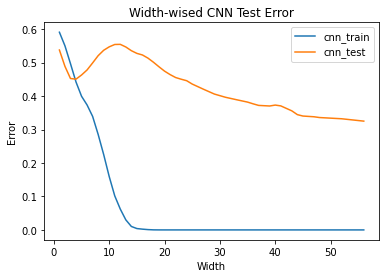

In [32]:
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter1d as gf1
from scipy.signal import savgol_filter as sf

plt.plot(sample_train_width['width'], gf1(1-sample_train_width['train_acc'], sigma=1), label='cnn_train')
plt.plot(sample_test_width['width'], gf1(1-sample_test_width['test_acc'], sigma=1), label='cnn_test')
plt.xlabel('Width')
plt.ylabel('Error')
plt.title('Width-wised CNN Test Error')
plt.legend()
plt.savefig('Width-wised CNN Test Error')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

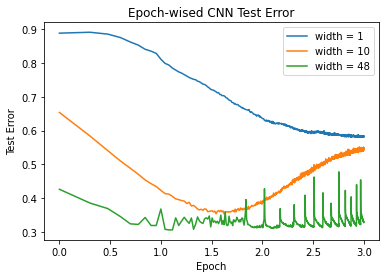

In [62]:
sample_epoch_test1 = sample_test.groupby('width').get_group(1)
sample_epoch_test5 = sample_test.groupby('width').get_group(5)
sample_epoch_test10 = sample_test.groupby('width').get_group(10)
sample_epoch_test20 = sample_test.groupby('width').get_group(20)
sample_epoch_test48 = sample_test.groupby('width').get_group(48)
plt.plot(np.log10(np.array(sample_epoch_test1['epoch']).astype('int')+1), 1-sample_epoch_test1['test_acc'], label='width = 1')
# plt.plot(sample_epoch_test5['epoch'], 1-sample_epoch_test5['test_acc'], label='width = 5')
plt.plot(np.log10(np.array(sample_epoch_test10['epoch']).astype('int')+1), 1-sample_epoch_test10['test_acc'], label='width = 10')
# plt.plot(sample_epoch_test20['epoch'], 1-sample_epoch_test20['test_acc'], label='width = 20')
plt.plot(np.log10(np.array(sample_epoch_test48['epoch']).astype('int')+1), 1-sample_epoch_test48['test_acc'], label='width = 48')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Error')
plt.title('Epoch-wised CNN Test Error')
plt.savefig('Epoch-wised CNN Test Error')
plt.show

array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ,
       0.77815125, 0.84509804, 0.90308999, 0.95424251, 1.        ,
       1.04139269, 1.07918125, 1.11394335, 1.14612804, 1.17609126,
       1.20411998, 1.23044892, 1.25527251, 1.2787536 , 1.30103   ,
       1.32221929, 1.34242268, 1.36172784, 1.38021124, 1.39794001,
       1.41497335, 1.43136376, 1.44715803, 1.462398  , 1.47712125,
       1.49136169, 1.50514998, 1.51851394, 1.53147892, 1.54406804,
       1.5563025 , 1.56820172, 1.5797836 , 1.59106461, 1.60205999,
       1.61278386, 1.62324929, 1.63346846, 1.64345268, 1.65321251,
       1.66275783, 1.67209786, 1.68124124, 1.69019608, 1.69897   ,
       1.70757018, 1.71600334, 1.72427587, 1.73239376, 1.74036269,
       1.74818803, 1.75587486, 1.76342799, 1.77085201, 1.77815125,
       1.78532984, 1.79239169, 1.79934055, 1.80617997, 1.81291336,
       1.81954394, 1.8260748 , 1.83250891, 1.83884909, 1.84509804,
       1.85125835, 1.8573325 , 1.86332286, 1.86923172, 1.87506

In [27]:
width = []
for name in namelist:
    width.append(int(name.split('_')[1][5:]))
width = np.array(width)
error = []
for wid in width:
    error.append(np.array(1-sample_test.groupby('width').get_group(wid)['test_acc']))

error = np.array(error)

widthn = np.sort(width)
errorn = error[np.argsort(width), ]


In [30]:
import matplotlib as mpl
import matplotlib

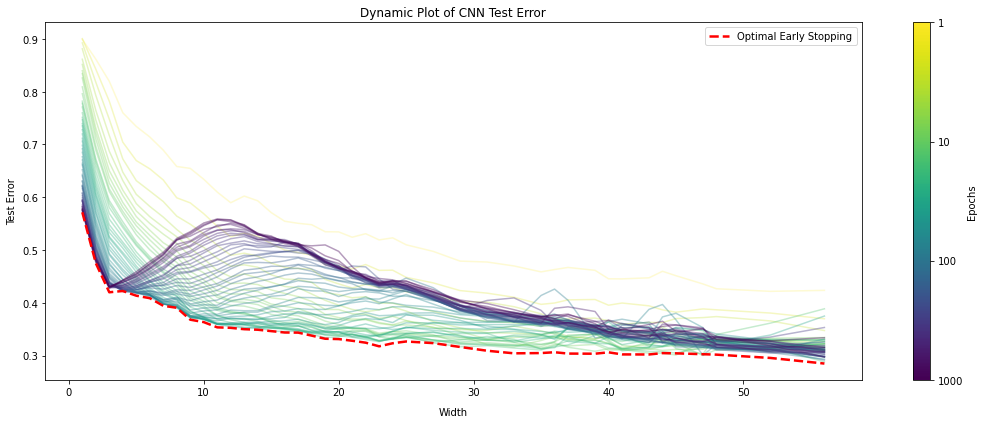

In [35]:
def rescale_cmap(name, rescale):
        cmap = plt.cm.get_cmap(name)
        colors = []
        for i in range(256):
            x = i/256
            colors += [cmap(rescale(x))]
        return matplotlib.colors.ListedColormap(colors)

def scale(maxIdx, i):
    return np.log(i) / np.log(maxIdx)

base = 1.1

maxIdx = errorn.shape[1]
idx = np.unique(np.array(base**np.arange(0, np.log(maxIdx)/np.log(base)), dtype=int) - 1)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True)
    
    # cos: skews more colors to the middle of the range
    # x**a: skews more colors towards the beginning/end of the range for larger/smaller a
    # p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap('viridis', lambda x: 0.5 * (1 - np.cos(np.pi * x**0.7)) / 2 + 0.5 * x)

for j, i in enumerate(idx):
    #s = j / len(idx)
    s = scale(maxIdx+1, i+1)
    
    alpha=min(0.2*np.sqrt(s)+0.2, 1)
    if s == 1.0:
        alpha = 1.0
    ax1.plot(widthn, sf(errorn[:, i], 5, 2), linestyle='-', color=cmap(1.0-s), alpha=alpha)

ax1.plot(widthn, sf(errorn.min(axis=1), 5, 2), linestyle='dashed', color='red', lw=2.5, label='Optimal Early Stopping')

ax1.set_ylabel('Test Error')
ax1.set_xlabel('Width')
ax1.set_title('Dynamic Plot of CNN Test Error')
ax1.xaxis.labelpad = 10
ax1.yaxis.labelpad = 5
#ax1.spines['top'].set_visible(False)
#ax1.spines['right'].set_visible(False)
ax1.legend()
plt.tight_layout()

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])

ticks = 1 - scale(maxIdx, [1, 10, 100, 1000])
#print(ticks)

cb = plt.colorbar(sm, cmap=cmap, ticks=ticks)
cb.ax.set_yticklabels(['1', '10', '100', '1000']) 
cb.set_label('Epochs')
fig.savefig('Dynamic Plot of CNN Test Error')


0.2
0.26334944832012736
0.2797539740989609
0.28958964898317757
0.296531092279807
0.3018520936802097
0.30614303421090316
0.3097244631219194
0.31278915182390304
0.31546170091938325
0.31782710640333234
0.32186233743499615
0.3236102597439284
0.32521560670024463
0.3280765870049662
0.3305663867756805
0.33276686369751557
0.3347358320431485
0.33651557989279185
0.3388979802460278
0.3403285457908505
0.3428872448516842
0.3445902186584251
0.34663108050536856
0.34845755132659323
0.3501089185324906
0.3519711872566562
0.3539651043783601
0.3557468330028717
0.3573558088427272
0.3592823348227623
0.3610052322465815
0.3627466048759913
0.3643172890520177
0.36604764995107975
0.3677412439043295
0.36939015986651397
0.3709895636424269
0.3725368775792933
0.3742080160762705
0.37571322433304494
0.3772980060383176
0.37886033869809294
0.3803905375175378
0.38193458100513644
0.3834259651729681
0.38494960082740776
0.38644312085739047
0.38789986228861817
0.3893781713983716
0.3908295428553349
0.39227249798884245
0.39369